# Kunci Jawaban Soal Praktikum B
## Isyarat dan Sistem 2
### Topik 2 - Pencuplikan

---
# Daftar Isi
1. Pencuplikan Sinyal Sinusoidal
2. Pencuplikan Sinyal Chirp

---
# I. Pencuplikan Sinyal Sinusoidal

# Nomor 1
Sebuah sinyal $x(t)$ didefinisikan sebagai

$$ x(t) = 1 + \cos(2000\pi t) + \cos(2016\pi t) $$

Kita perhatikan bahwa frekuensi fundamental tertinggi sinyal tersebut adalah $2016\pi\;\text{rad/s}$. Sehingga, frekuensi pencuplikan $\omega_s$ harus dua kali lebih besar dari itu

$$ \omega_s > 4032\pi\;\text{rad/s} $$

# Nomor 2
Berikut ini adalah plot $x(t)$ yang dicuplik dengan $\omega_s = 10000\pi\;\text{rad/s}$.

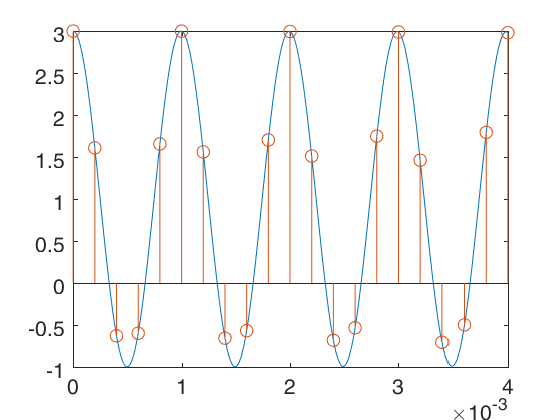

In [1]:
syms x1 t
x1 = 1 + cos(2000*pi*t) + cos(2016*pi*t);
fplot(x1);
hold on;

ws = 10000*pi;
fs = ws/(2*pi);
T = 1/fs;
n = 0 : fs-1;
t = n*T;
x2 = 1 + cos(2000*pi*t) + cos(2016*pi*t);
hold on;
stem(t, x2);
axis([0 0.004 -1 3]);

Perhatikan pada _source code_ di atas! Di situ terdapat dua buah variabel `x1` dan `x2`. Hasil pencuplikan yang sebenarnya terdapat pada variabel `x2`, sementara `x1` hanya sebagai perbandingan saja.

# Nomor 3
Efek bunyinya adalah seperti bunyi beep yang berayun-ayun dengan panjang durasinya sekitar 1 detik.

In [2]:
sound(x2, fs);

# Nomor 4
Sebelumnya, kita akan menggunakan fungsi `ctfts()` untuk melakukan transformasi Fourier terhadap sinyal $x(t)$. Berikut ini adalah _source code_-nya.

```matlab
function [X, w] = ctfs(x,T)
% CTFTS calculates the continuous-time Fourier transform (CTFT) of a
% periodic signal x(t) which is reconstructed from the samples in the
% vector x using ideal bandlimited interpolation. The vector x contains
% samples if x(t) over an integer number of periods, and T contains the
% sampling period.
%
% The vector X contains the area of the impulses at the frequency values
% stored in the vector w.
%
% This function makes use of the relationship between the CTFT of x(t) and
% the DTFT of its samples x[n], as well as the relationship between the
% DTFT of the samples x[n] and the DTFS of x[n].
N = length(x);
X = fftshift(fft(x,N))*(2*pi/N);
w = 2*pi*linspace(-1,1-1/N,N)/(2*T);
```

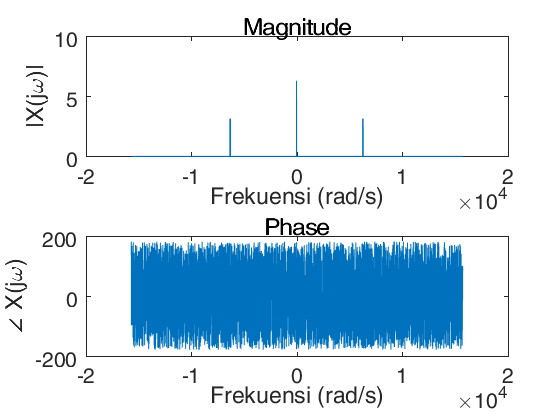

In [3]:
[X, w] = ctfs(x2, T);
X_magnitude = abs(X);
X_phase = angle(X);

subplot(2,1,1); 
plot(w, X_magnitude); 
title('Magnitude'); 
xlabel('Frekuensi (rad/s)'); 
ylabel('|X(j\omega)|');

subplot(2,1,2); 
plot(w, rad2deg(X_phase)); 
title('Phase'); 
xlabel('Frekuensi (rad/s)'); 
ylabel('\angle X(j\omega)');

Agar tercuplik dengan baik maka kita harus membuat filter _band-pass_ yang mampu mencakup seluruh impulse tersebut!. Cara yang paling cepat untuk membuat filter adalah dengan menggunakan filter Butterworth. Baca kembali buku ISIS 2 untuk keterangan lebih lanjut mengenai filter Butterworth.

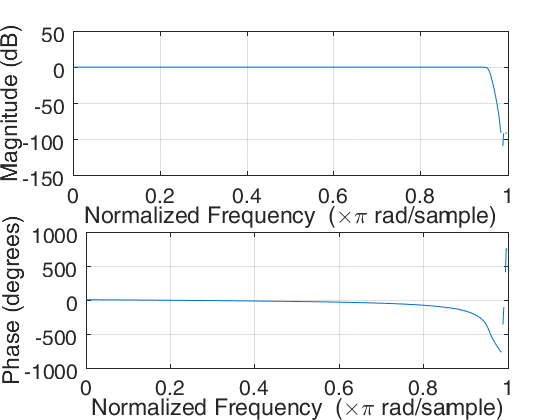

In [6]:
wc = 1.5*10^4;
fc = wc/(2*pi);
n = 10;
[b, a] = butter(n, fc/(fs/2));
freqz(b, a); grid on;

Sekarang, kita akan _feed_ `x2` ke dalam sistem tersebut.

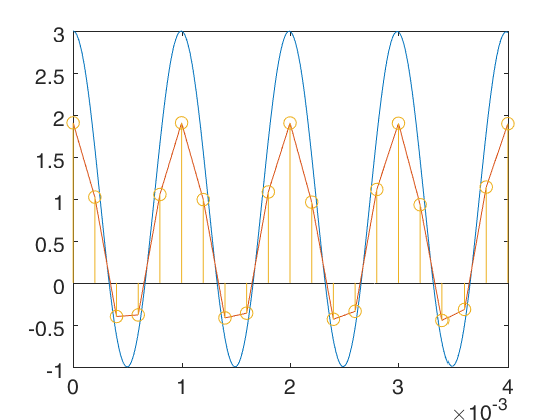

In [7]:
y = lsim(b, a, x2, t);
fplot(x1); hold on;
plot(t, y);
stem(t, y);
axis([0 0.004 -1 3]);

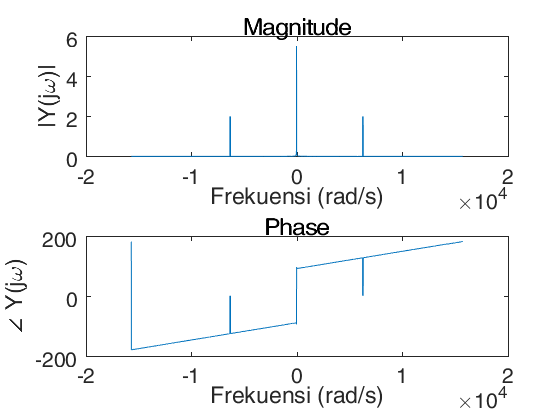

In [8]:
[Y, w] = ctfs(y, T);
Y_magnitude = abs(Y);
Y_phase = angle(Y);

subplot(2,1,1); 
plot(w, Y_magnitude); 
title('Magnitude'); 
xlabel('Frekuensi (rad/s)'); 
ylabel('|Y(j\omega)|');

subplot(2,1,2); 
plot(w, rad2deg(Y_phase)); 
title('Phase'); 
xlabel('Frekuensi (rad/s)'); 
ylabel('\angle Y(j\omega)');

# Nomor 5


Kurang lebih efek bunyi `y` sama seperti `x2`. Namun untuk bunyi `y` terdengar sedikit lebih lemah dibandingkan bunyi `x2`.

In [9]:
sound(y, fs);

# Nomor 6

Jika kita melihat plot `x2` dan `y` versus waktu, maka kita perhatikan bahwa sebenarnya sinyal `y` sedikit mengalami atenuasi. Artinya, filter Butterworth itu sendiri tidak seideal yang kita kira. Dengan menambah orde filter tentu filter yang kita rancang akan semakin mendekati ideal.

Kemudian, jika kita melihat plot Bode `x2` dan `y`, maka letak impulse tanggapan frekuensi-nya tidak berubah, itu berarti filter yang kita rancang berhasil merekonstruksi sinyal `x2`. Sekali lagi, kita perhatikan bahwa memang besar magnitude impulse `y` sedikit lebih kecil dibandingkan magnitude impulse `x2`.

Hal ini tentu mempertegas kembali hasil nomor 5, yang dimana bunyi `y` sedikit lebih lemah dibandingkan bunyai `x2`. (Ini hanya bersifat intuitif, jika kalian tidak mendengar perbedaannya... _it's okay_).

# Nomor 7
Sinyal $x(t)$ jelas bukan pita-terbatas. Mari kita cek tanggapan frekuensinya.

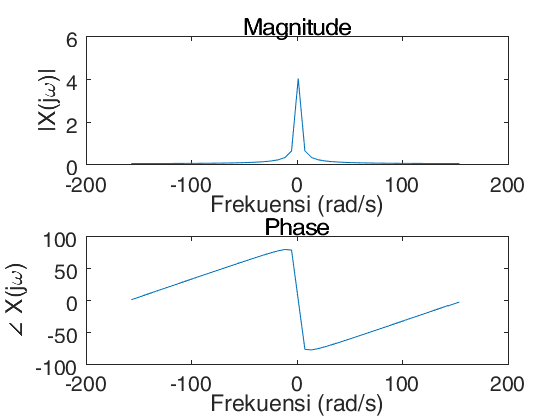

In [11]:
ws = 100*pi;
fs = ws/(2*pi);
T = 1/fs;
n = 0 : fs-1;
t = n*T;
x = exp(-t);

[X, w] = ctfs(x, T);
X_magnitude = abs(X);
X_phase = angle(X);

subplot(2,1,1); 
plot(w, X_magnitude); 
title('Magnitude'); 
xlabel('Frekuensi (rad/s)'); 
ylabel('|X(j\omega)|');

subplot(2,1,2); 
plot(w, rad2deg(X_phase)); 
title('Phase'); 
xlabel('Frekuensi (rad/s)'); 
ylabel('\angle X(j\omega)');

Perhatikan bahwa "kelihatannya" seperti pita terbatas, namun sebenarnya tidak! Hal ini dikarenakan, untuk mencapai $|X(j\omega)| = 0 $ maka kita harus atur $\omega \rightarrow \infty$!

Itu berarti, kita tidak bisa merekonstruksi sinyal tersebut seutuhnya (ada sebagian informasi yang hilang). 

# Nomor 8
Persamaan yang diberikan di soal hanya berupa perkiraan. Artinya, kita akan hendak mencuplik sinyal tersebut namun setidaknya hanya 1% saja informasi yang hilang (informasi disini mengacu pada energi sinyal).

$$ \frac{0.99}{2\pi}\int^{\infty}_{-\infty}|X(j\omega)|^2\;d\omega = \frac{1}{2\pi}\int^{\omega_M}_{-\omega_M}|X(j\omega)|^2\;d\omega $$

$$ 0.99\int^{\infty}_{-\infty}\frac{1}{1+\omega^2}\;d\omega = \int^{\omega_M}_{-\omega_M} \frac{1}{1+\omega^2} \;d\omega $$

$$ 0.99 \left(\arctan\left(\infty\right)-\arctan\left(-\infty\right)\right)  = \left(\arctan\left(\omega_M\right)-\arctan\left(-\omega_M\right)\right) $$

$$ 0.99 \arctan\left(\infty\right)  = \arctan\left(\omega_M\right) $$

$$ 1.555 = \arctan\left(\omega_M\right) $$

$$ \omega_M = 63.3005\;\text{rad/s}$$

Dengan demikian, kita perkirakan bahwa $\omega_s$ paling tidak harus dua kali dari $\omega_M$, atau dengan kata lain $\omega_s > 126.601\;\text{rad/s}$.

---
# II. Pencuplikan Sinyal Chirp

# Nomor 1

$\omega_{\text{inst}}$ bernilai minimum pada saat $t \rightarrow 0$.

$$\omega_{\text{inst}} = 0\;\text{krad/s} $$

$\omega_{\text{inst}}$ bernilai maksimum pada saat $t \rightarrow 1$.

$$\omega_{\text{inst}} = 2\omega_0 = 62.832\;\text{krad/s} $$

# Nomor 2

Agar tidak terjadi efek aliasing, kita atur agar $\omega_s > 125.664\;\text{krad/s}$.

# Nomor 3
Kita atur $\omega_s = 130\;\text{krad/s}$.

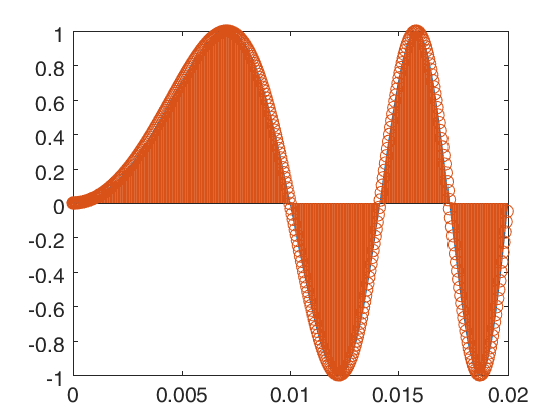

In [17]:
syms x1 t
x1 = sin(2*pi*5000*(t.^2));
fplot(x1);
hold on;

ws = 130000;
fs = ws/(2*pi);
T = 1/fs;
n = 0 : fs-1;
t = n*T;
x2 = sin(2*pi*5000*(t.^2));
hold on;
stem(t, x2);
axis([0 0.02 -1 1]);

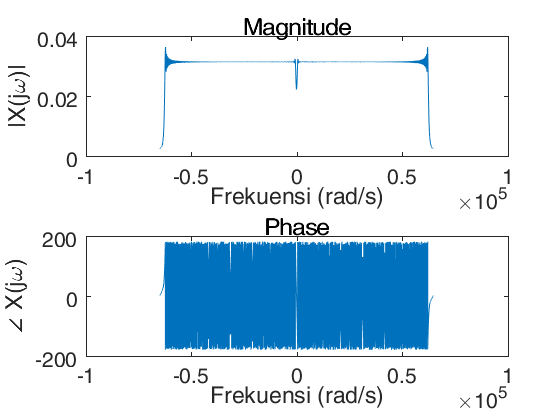

In [18]:
[X, w] = ctfs(x2, T);
X_magnitude = abs(X);
X_phase = angle(X);

subplot(2,1,1); 
plot(w, X_magnitude); 
title('Magnitude'); 
xlabel('Frekuensi (rad/s)'); 
ylabel('|X(j\omega)|');

subplot(2,1,2); 
plot(w, rad2deg(X_phase)); 
title('Phase'); 
xlabel('Frekuensi (rad/s)'); 
ylabel('\angle X(j\omega)');

# Nomor 4
Efek bunyinya adalah seperti bunyi beep yang memiliki durasi sekitar 1 detik, dan seolah-olah semakin lama suaranya semakin keras.

In [19]:
sound(x2, fs);

# Nomor 5
Kita atur $\omega_x = 30\;\text{krad/s}$.

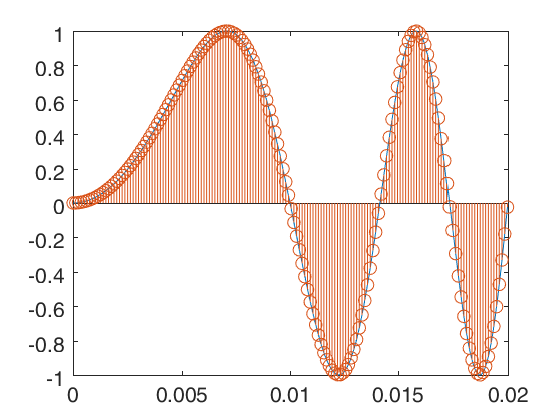

In [23]:
syms x1 t
x1 = sin(2*pi*5000*(t.^2));
fplot(x1);
hold on;

ws = 50000;
fs = ws/(2*pi);
T = 1/fs;
n = 0 : fs-1;
t = n*T;
x2 = sin(2*pi*5000*(t.^2));
hold on;
stem(t, x2);
axis([0 0.02 -1 1]);

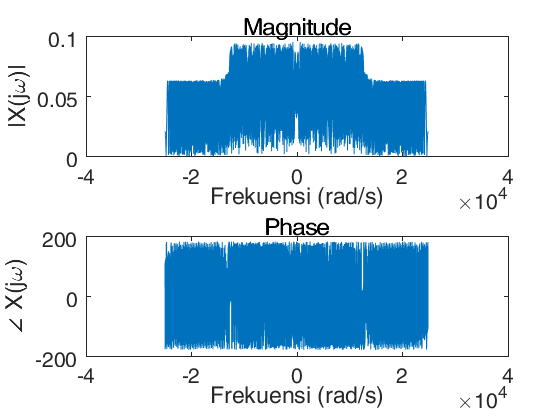

In [24]:
[X, w] = ctfs(x2, T);
X_magnitude = abs(X);
X_phase = angle(X);

subplot(2,1,1); 
plot(w, X_magnitude); 
title('Magnitude'); 
xlabel('Frekuensi (rad/s)'); 
ylabel('|X(j\omega)|');

subplot(2,1,2); 
plot(w, rad2deg(X_phase)); 
title('Phase'); 
xlabel('Frekuensi (rad/s)'); 
ylabel('\angle X(j\omega)');

# Nomor 6
Efek bunyinya adalah seperti bunyi beep yang memiliki durasi sekitar 1 detik, dan seolah-olah suaranya berayun dari rendah ke tinggi kemudian kembali lagi ke rendah.

In [25]:
sound(x2, fs);

# Nomor 7
Secara intuitif berdasarkan bunyi-nya kita tahu bahwa untuk kasus undersampling bunyi-nya berbeda dengan kasus oversampling. Oleh karena sinyal tersebut memiliki frekuensi yang semakin tinggi, maka seharusnya bunyi yang kita dengar juga semakin tinggi suaranya (INTUITIF!).

Jika kita perhatikan plot Bode, untuk kasus oversampling, memiliki nilai tak-nol di sepanjang frekuensi sekitar  $0\;\text{krad/s}$ sampai $60\;\text{krad/s}$, sementara pada kasus undersampling justru nilai tak-nol di sepanjang frekuensi sekitar $0\;\text{krad/s}$ sampai  $30\;\text{krad/s}$.